<a href="https://colab.research.google.com/github/jcjimenezb123/MetodosNumericosPython/blob/master/03optimizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El método de la sección áurea es un método de optimización que se utiliza para encontrar el mínimo o el máximo de una función unidimensional continua en un intervalo dado. Este método se basa en el concepto matemático de la proporción áurea y utiliza una estrategia de búsqueda iterativa.

El método de la sección áurea se basa en dividir iterativamente el intervalo de búsqueda en proporciones áureas y seleccionar el subintervalo que contiene al mínimo o máximo buscado. A medida que se realizan más iteraciones, el intervalo de búsqueda se reduce hasta que se alcanza la precisión deseada.

El método de la sección áurea es especialmente útil cuando no se dispone de información sobre la derivada de la función y se necesita encontrar el mínimo o máximo de manera eficiente. Sin embargo, cabe destacar que este método solo se aplica a funciones unidimensionales.

In [20]:
import numpy as np

def golden_section_search(function, a, b, epsilon=1e-5):
    golden_ratio = (np.sqrt(5) - 1) / 2
    x1 = a + (1 - golden_ratio) * (b - a)
    x2 = a + golden_ratio * (b - a)

    while abs(b - a) > epsilon:
        if function(x1) < function(x2):
            a = x1
            x1 = x2
            x2 = a + golden_ratio * (b - a)
        else:
            b = x2
            x2 = x1
            x1 = a + (1 - golden_ratio) * (b - a)

    return (a + b) / 2

In [21]:
f = lambda x:2*np.sin(x)-x**2/10

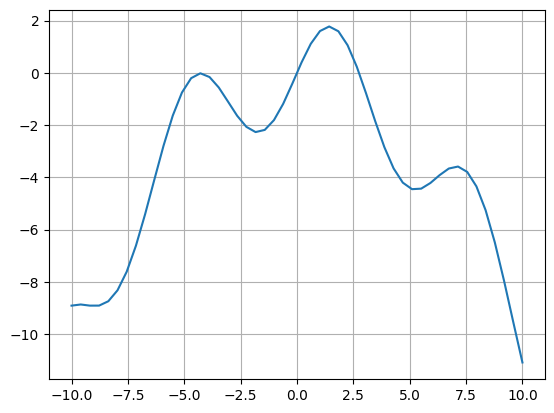

In [23]:
import matplotlib.pyplot as plt
xs = np.linspace() #<---- crear el rango
plt.plot() <--- #graficar el rango
plt.grid()
plt.show()

In [25]:
max = golden_section_search() #<---- dar los parametros
print(max)

1.4275524140085705


Método de Newton

In [8]:
import sympy as sp

In [12]:
x = sp.Symbol('x')
fx = 2*sp.sin(x)-x**2/10
dfx = sp.diff() #<--- obtener la primera derivada
dfx2 = sp.diff() #<--- obtener la segunda derivada
print(dfx)
print(dfx2)

-x/5 + 2*cos(x)
-(2*sin(x) + 1/5)


In [14]:
from scipy.optimize import newton
import numpy as np

In [26]:
max = newton(func=, #<--- derivada
             x0=, #<--- valor inicial
             fprime=) #<--- segunda derivada
print(max)

1.4275517787645942


Método de la secante

In [27]:
max = newton(func=, #<--- primera derivada
             x0=,x1=) #<--- valores iniciales
print(max)

1.4275517787645942
